# Regression: NY Crime Data in 2013

Using this data I'm going to build a regression model to predict property crimes. I'll add more features and check whether they are valuable or not. The goal here is prediction while all four assumptions of multivariable linear regression are true and make sure the model has good predictive validity for new data. 

### Proposed regression model is:

$$ Property crime = \alpha + Population + Population^2 + Murder + Robbery + Burglary$$



In [138]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

from sklearn import linear_model
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score

from scipy.stats import norm
from scipy import stats

import statsmodels.formula.api as smf

## 1. EDA | Data Cleaning | Feature Selection

In [139]:
path = r'C:\Users\hafeez_poldz\Desktop\Thinkful\Unit 2\datas\table_8_offenses_known_to_law_enforcement_new_york_by_city_2013.xls'
df = pd.read_excel(path, header = 4)


# rename the columns
df.rename(columns = {'Murder and\nnonnegligent\nmanslaughter':'Murder', 
                     'Property\ncrime':'Property_crime',
                    'Larceny-\ntheft': 'Larceny',
                    'Motor\nvehicle\ntheft': 'MV_theft'}, inplace = True)

# remove last 3 rows 
df.drop(df.iloc[348:, :].index, inplace = True)

for col in ['Population', 'Murder', 'Robbery', 'Property_crime', 'Larceny', 'Burglary', 'MV_theft']:
    df[col] = df[col].astype(np.int64)
df.isnull().sum()

City                              0
Population                        0
Violent\ncrime                    0
Murder                            0
Rape\n(revised\ndefinition)1    348
Rape\n(legacy\ndefinition)2       0
Robbery                           0
Aggravated\nassault               0
Property_crime                    0
Burglary                          0
Larceny                           0
MV_theft                          0
Arson3                          161
dtype: int64

In [140]:
# create a dataframe to hold features
features = pd.DataFrame()
features['property_crime'] = df['Property_crime']
features['murder'] = np.where(df['Murder']>=1, 1, 0)
features['robbery'] = np.where(df['Robbery']>=1, 1, 0)
features['burglary'] = np.where(df['Burglary']>=1, 1, 0)
features['mv_theft'] = np.where(df['MV_theft']>=1, 1, 0)
features['larceny'] = np.where(df['Larceny']>=1, 1, 0)
features['population'] = df['Population']
features['population_squared'] = np.square(features.population)
features.describe()

,property_crime,murder,robbery,burglary,mv_theft,larceny,population,population_squared
count,348.000000,348.000000,348.000000,348.000000,348.000000,348.000000,3.480000e+02,3.480000e+02
mean,792.606322,0.140805,0.600575,0.939655,0.732759,0.979885,4.003763e+04,2.035547e+11
std,7659.724746,0.348321,0.490486,0.238467,0.443157,0.140596,4.500374e+05,3.778876e+12
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.260000e+02,2.766760e+05
25%,40.500000,0.000000,0.000000,1.000000,0.000000,1.000000,3.003000e+03,9.018117e+06
50%,112.500000,0.000000,1.000000,1.000000,1.000000,1.000000,7.233500e+03,5.232568e+07
75%,341.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.842750e+04,3.397536e+08
max,141971.000000,1.000000,1.000000,1.000000,1.000000,1.000000,8.396126e+06,7.049493e+13


## 2. Linear Regression Model

In [141]:
# instantiate and fit our model
regr = linear_model.LinearRegression()
Y = features['property_crime']
X = features[['population','population_squared','murder','robbery', 'burglary','larceny', 'mv_theft']]
regr.fit(X, Y)

# Inspect the results.
print('\nCoefficients: \n', regr.coef_)
print('\nIntercept: \n', regr.intercept_)
print('\nR-squared:')
print(regr.score(X, Y))


Coefficients: 
 [ 3.48246160e-02 -2.13091068e-09  1.96889509e+01 -6.14548590e+01
 -4.79316646e+01  8.72386431e+00 -8.08197985e+01]

Intercept: 
 -38.0838683692856

R-squared:
0.9961462888012184


(347, 8)


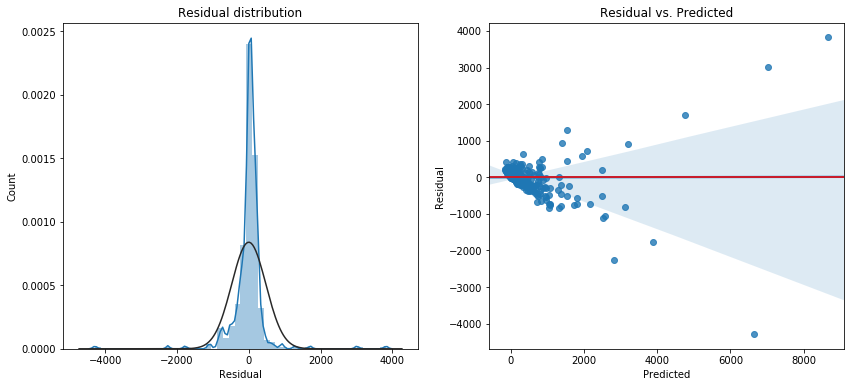

In [142]:
# extract predicted values
predicted = regr.predict(X).ravel()

# add predicted to features dataframe
features['predicted'] = pd.Series(predicted)

# z-score method to remove outliers
#no_outliers = features.copy()
#z = np.abs(stats.zscore(no_outliers))
#threshold = 2
#features = features[(z < threshold).all(axis=1)]

outliers = features.nlargest(1, ['predicted']).index.tolist()
features.drop(index = outliers, axis = 0, inplace = True)

# remove predicted column
predicted = np.array(features.predicted)
features.drop(['predicted'], axis = 1, inplace = True)
print(features.shape)
features.describe()

# Calculate the error, also called the residual.
actual = features['property_crime']
residual = actual - predicted

# plot residual distribution
plt.figure(figsize = (14, 6))
plt.subplot(121)
_ = sns.distplot(residual, fit = norm)
_.set(title = 'Residual distribution', xlabel = 'Residual', ylabel = 'Count')

# scatter plot residual vs. predicted
plt.subplot(122)
_ = sns.regplot(predicted, residual)
_.axhline(y=0, color = 'r')
_.set(title = 'Residual vs. Predicted', xlabel = 'Predicted', ylabel = 'Residual')

plt.show()


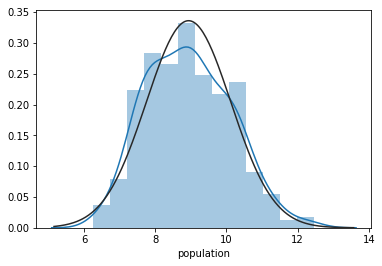

In [143]:
sns.distplot(np.log(features.population), fit = norm)

In [144]:

regr = linear_model.LinearRegression()

Y = features['property_crime']
X = features[['population','population_squared','murder','robbery', 'burglary', 'larceny', 'mv_theft']]
regr.fit(X, Y)

print('\nCoefficients: \n', regr.coef_)
print('\nIntercept: \n', regr.intercept_)
print('\nR-squared:')
print(regr.score(X, Y))


Coefficients: 
 [ 1.28718198e-02  1.15238267e-07  1.94790069e+02  8.95994188e+01
 -3.98745094e+00 -3.07791891e+00  1.23246114e+01]

Intercept: 
 -16.15854117576282

R-squared:
0.8445137974722529


## 3. Cross Validation

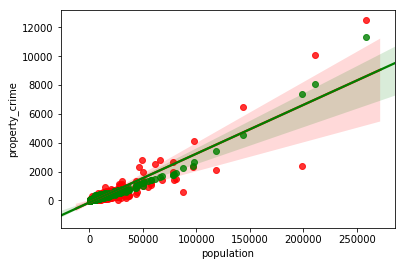

Cross Validation 5 folds: [0.92113726 0.73868128 0.7693965  0.87327444 0.31520846]
mean: 0.7235395876487718, std: 0.21472391490996248


In [145]:

y_pred = regr.predict(X)

# plot predicted property crime vs. actual property crime
sns.regplot(features.population, Y, color = 'r')
sns.regplot(features.population, y_pred, color = 'g')
plt.show()

cvs = cross_val_score(regr, X, Y, cv = 5)
print('Cross Validation 5 folds: {}'.format(cvs))
print('mean: {}, std: {}'.format(np.mean(cvs), np.std(cvs)))

In [146]:
# write out the model formula
formula = 'property_crime ~ population+population_squared+murder+robbery+burglary+mv_theft+larceny'

lm = smf.ols(formula = formula, data = features).fit()

print('Parameters \n', lm.params, '\n')
print('P-values \n', lm.pvalues, '\n')
print('R-square: {}'.format(lm.rsquared))

Parameters 
 Intercept            -1.615854e+01
population            1.287182e-02
population_squared    1.152383e-07
murder                1.947901e+02
robbery               8.959942e+01
burglary             -3.987451e+00
mv_theft              1.232461e+01
larceny              -3.077919e+00
dtype: float64 

P-values 
 Intercept             9.178572e-01
population            1.471000e-08
population_squared    6.869976e-24
murder                1.186823e-02
robbery               1.053663e-01
burglary              9.712922e-01
mv_theft              8.345684e-01
larceny               9.863718e-01
dtype: float64 

R-square: 0.844513797472253


In [147]:
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:         property_crime   R-squared:                       0.845
Model:                            OLS   Adj. R-squared:                  0.841
Method:                 Least Squares   F-statistic:                     263.0
Date:                Tue, 12 Feb 2019   Prob (F-statistic):          7.45e-133
Time:                        13:43:34   Log-Likelihood:                -2577.7
No. Observations:                 347   AIC:                             5171.
Df Residuals:                     339   BIC:                             5202.
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
Intercept            -16.1585    156.560     -0.103      0.918    -324.109     291.792
population             0.0129      0.002      5.806      0.000       0.009       0.017
population_squared  1.152e-07   1.06e-08     10.892      0.000    9.44e-08    1.36e-07
murder               194.7901     77.001      2.530      0.012      43.330     346.250
robbery               89.5994     55.182      1.624      0.105     -18.942     198.141
burglary              -3.9875    110.719     -0.036      0.971    -221.769     213.795
mv_theft              12.3246     58.967      0.209      0.835    -103.664     128.313
larceny               -3.0779    180.060     -0.017      0.986    -357.253     351.097
==============================================================================
Omnibus:                      394.087   Durbin-Watson:                   1.943
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            73940.681
Skew:                          -4.482   Prob(JB):                         0.00
Kurtosis:                      73.948   Cond. No.                     5.34e+10
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.34e+10. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

From the p-values, we see the p-value for "mv_theft", "robbery", "larceny" and "burglary" is greater than .05, suggesting that there is probably no effect for that feature – and that dropping it would not adversely affect the  R^2 .

In [148]:
features.drop(['mv_theft', 'burglary', 'robbery', 'larceny'], axis = 1, inplace = True)


In [149]:
# write out the model formula
formula = 'property_crime ~ population+population_squared+murder'

lm = smf.ols(formula = formula, data = features).fit()

print('Parameters \n', lm.params, '\n')
print('P-values \n', lm.pvalues, '\n')
print('R-square: {}'.format(lm.rsquared))

Parameters 
 Intercept             1.886199e+01
population            1.448029e-02
population_squared    1.087478e-07
murder                2.069333e+02
dtype: float64 

P-values 
 Intercept             5.327486e-01
population            3.065659e-12
population_squared    1.885443e-24
murder                7.252617e-03
dtype: float64 

R-square: 0.843013263731697


In [134]:
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:         property_crime   R-squared:                       0.843
Model:                            OLS   Adj. R-squared:                  0.842
Method:                 Least Squares   F-statistic:                     614.0
Date:                Tue, 12 Feb 2019   Prob (F-statistic):          1.68e-137
Time:                        13:42:45   Log-Likelihood:                -2579.3
No. Observations:                 347   AIC:                             5167.
Df Residuals:                     343   BIC:                             5182.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
Intercept             18.8620     30.206      0.624      0.533     -40.550      78.274
population             0.0145      0.002      7.235      0.000       0.011       0.018
population_squared  1.087e-07   9.85e-09     11.040      0.000    8.94e-08    1.28e-07
murder               206.9333     76.609      2.701      0.007      56.251     357.615
==============================================================================
Omnibus:                      395.681   Durbin-Watson:                   1.926
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            72553.263
Skew:                          -4.526   Prob(JB):                         0.00
Kurtosis:                      73.258   Cond. No.                     1.79e+10
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.79e+10. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

# Model Validation on California Crime Data 2013

In [127]:
path1 = r'C:\Users\hafeez_poldz\Desktop\Thinkful\Unit 2\datas\table_8_offenses_known_to_law_enforcement_california_by_city_2013.xls'
df2014 = pd.read_excel(path, header = 4)

# rename the columns
df2014.rename(columns = {'Murder and\nnonnegligent\nmanslaughter':'Murder', 
                     'Property\ncrime':'Property_crime',
                    'Larceny-\ntheft': 'Larceny',
                    'Motor\nvehicle\ntheft': 'MV_theft'}, inplace = True)

# remove last 7 rows 
df2014 = df2014[np.isfinite(df2014['Property_crime'])]

for col in ['Population', 'Murder', 'Robbery', 'Property_crime']:
    df2014[col] = df2014[col].astype(np.int64)

# create a dataframe to hold features
features_2014 = pd.DataFrame()
features_2014['property_crime'] = df2014['Property_crime']
features_2014['murder'] = np.where(df2014['Murder']>=1, 1, 0)
features_2014['population'] = df2014['Population']
features_2014['population_squared'] = np.square(features_2014.population)
features_2014.describe()

,property_crime,murder,population,population_squared
count,348.000000,348.000000,3.480000e+02,3.480000e+02
mean,792.606322,0.140805,4.003763e+04,2.035547e+11
std,7659.724746,0.348321,4.500374e+05,3.778876e+12
min,0.000000,0.000000,5.260000e+02,2.766760e+05
25%,40.500000,0.000000,3.003000e+03,9.018117e+06
50%,112.500000,0.000000,7.233500e+03,5.232568e+07
75%,341.000000,0.000000,1.842750e+04,3.397536e+08
max,141971.000000,1.000000,8.396126e+06,7.049493e+13


In [131]:
# instantiate and fit our model
regr = linear_model.LinearRegression()
Y_2014 = features_2014['property_crime']
X_2014 = features_2014[['population','population_squared','murder']]
regr.fit(X_2014, Y_2014)

# Inspect the results.
print('\nCoefficients: \n', regr.coef_)
print('\nIntercept: \n', regr.intercept_)
print('\nR-squared:')
print(regr.score(X_2014, Y_2014))


Coefficients: 
 [1.44802892e-02 1.08747761e-07 2.06933253e+02]

Intercept: 
 18.861991652627694

R-squared:
0.843013263731697


(347, 4)


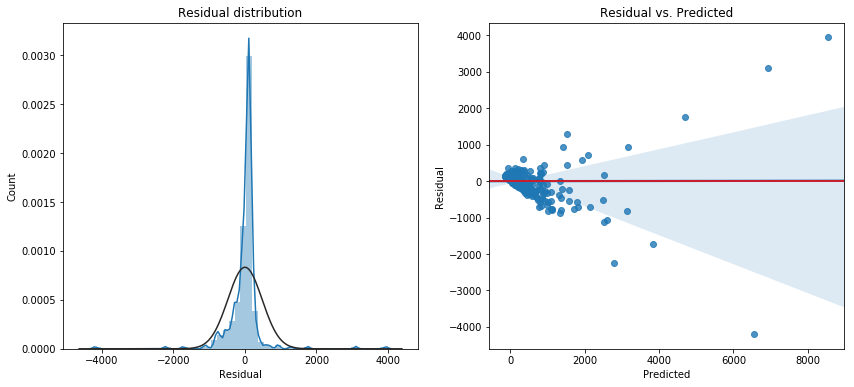

In [129]:
# extract predicted values
predicted = regr.predict(X_2014).ravel()

# add predicted to features dataframe
features_2014['predicted'] = pd.Series(predicted)

# z-score method to remove outliers
#no_outliers = features.copy()
#z = np.abs(stats.zscore(no_outliers))
#threshold = 2
#features = features[(z < threshold).all(axis=1)]

outliers = features_2014.nlargest(1, ['predicted']).index.tolist()
features_2014.drop(index = outliers, axis = 0, inplace = True)

# remove predicted column
predicted = np.array(features_2014.predicted)
features_2014.drop(['predicted'], axis = 1, inplace = True)
print(features_2014.shape)
features_2014.describe()

# Calculate the error, also called the residual.
actual = features_2014['property_crime']
residual = actual - predicted

# plot residual distribution
plt.figure(figsize = (14, 6))
plt.subplot(121)
_ = sns.distplot(residual, fit = norm)
_.set(title = 'Residual distribution', xlabel = 'Residual', ylabel = 'Count')

# scatter plot residual vs. predicted
plt.subplot(122)
_ = sns.regplot(predicted, residual)
_.axhline(y=0, color = 'r')
_.set(title = 'Residual vs. Predicted', xlabel = 'Predicted', ylabel = 'Residual')

plt.show()


In [130]:

regr = linear_model.LinearRegression()
Y_cali = features_2014['property_crime']
X_cali = features_2014[['population','population_squared','murder']]
regr.fit(X_cali, Y_cali)

print('\nCoefficients: \n', regr.coef_)
print('\nIntercept: \n', regr.intercept_)
print('\nR-squared:')
print(regr.score(X_cali, Y_cali))


Coefficients: 
 [1.44802892e-02 1.08747761e-07 2.06933253e+02]

Intercept: 
 18.861991652627694

R-squared:
0.843013263731697
